In [ ]:
!pip install pandas numpy scipy matplotlib seaborn plotly

In [ ]:
import pandas as pd

df = pd.read_csv("clean_dataset.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        6173 non-null   object 
 1   type           6173 non-null   object 
 2   title          6173 non-null   object 
 3   director       6173 non-null   object 
 4   cast           6173 non-null   object 
 5   country        6173 non-null   object 
 6   date_added     6168 non-null   object 
 7   release_year   6173 non-null   int64  
 8   rating         6173 non-null   object 
 9   duration       6173 non-null   object 
 10  listed_in      6173 non-null   object 
 11  description    6173 non-null   object 
 12  duration_num   6173 non-null   float64
 13  duration_type  6173 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 675.3+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0,Season
3,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,min
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,min


# 🎯 Langkah Analisis
**1️⃣ Pertanyaan Analisis Kompleks**

1. Apakah terdapat hubungan antara tahun rilis (release_year) dan durasi film (duration_num)?
→ Uji dengan korelasi Pearson, karena kedua variabel berskala numerik (interval/rasio).

2. Apakah rata-rata durasi berbeda antara jenis konten (Movie vs TV Show)?
→ Uji dengan uji t dua sampel independen, karena kita bandingkan dua kelompok terhadap satu variabel numerik.

# 🧪 2️⃣ Uji Statistik Dasar
**Uji 1: Korelasi Pearson (Release Year vs Duration)**

Alasan Pemilihan:

> Uji Pearson digunakan untuk melihat hubungan linier antara dua variabel numerik.


Korelasi Pearson: -0.204
Nilai p: 0.0000


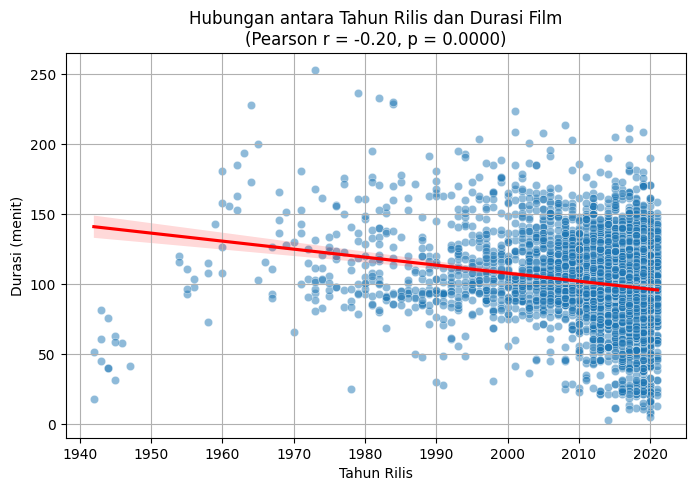

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Baca dataset
df = pd.read_csv("clean_dataset.csv")

# Ambil hanya film (durasi dalam menit)
df_movie = df[df['duration_type'] == 'min']

# Hitung korelasi Pearson
corr, p_value = pearsonr(df_movie['release_year'], df_movie['duration_num'])
print(f"Korelasi Pearson: {corr:.3f}")
print(f"Nilai p: {p_value:.4f}")

# --- Bagan (Scatter Plot) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_movie, x='release_year', y='duration_num', alpha=0.5)
sns.regplot(data=df_movie, x='release_year', y='duration_num', scatter=False, color='red')

plt.title(f'Hubungan antara Tahun Rilis dan Durasi Film\n(Pearson r = {corr:.2f}, p = {p_value:.4f})', fontsize=12)
plt.xlabel('Tahun Rilis')
plt.ylabel('Durasi (menit)')
plt.grid(True)
plt.show()



# 🖼️ Hasilnya:

**Titik-titik biru**: film individual.

**Garis merah:** trendline regresi linier yang memperlihatkan arah hubungan (naik/turun).

**Kalau garisnya agak menurun** → berarti korelasi negatif.

# **Interpretasi:**
*Terdapat korelasi negatif lemah antara tahun rilis dan durasi film. Artinya, semakin baru film dirilis, cenderung durasinya sedikit lebih pendek. Karena nilai p < 0.05, hubungan ini signifikan secara statistik.*

# **# Uji 2: Uji t Dua Sampel Independen (Movie vs TV Show)**

Alasan Pemilihan:
*Uji t digunakan untuk mengetahui apakah rata-rata dua kelompok berbeda secara signifikan pada variabel numerik yang sama.*

T-statistik: 264.285
Nilai p: 0.0000


/tmp/ipython-input-1559143422.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='duration_num', palette='Set2')


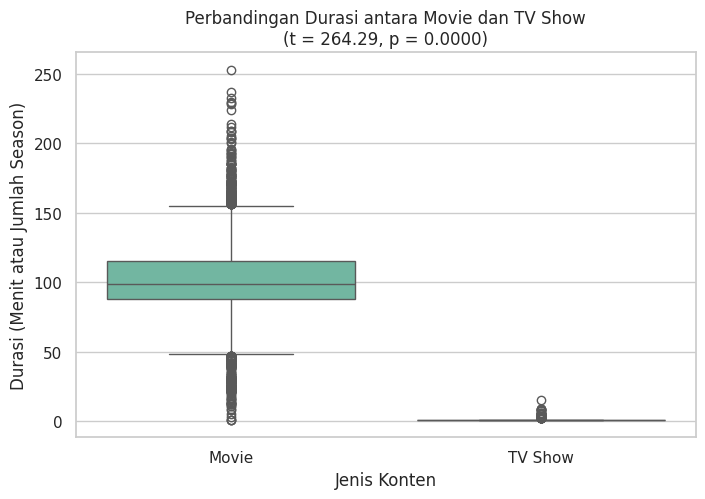

In [ ]:
movie_duration = df[df['type'] == 'Movie']['duration_num']
tv_duration = df[df['type'] == 'TV Show']['duration_num']

# Uji t dua sampel independen
t_stat, p_value = ttest_ind(movie_duration, tv_duration, equal_var=False)
print(f"T-statistik: {t_stat:.3f}")
print(f"Nilai p: {p_value:.4f}")

# --- Bagan Boxplot ---
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

sns.boxplot(data=df, x='type', y='duration_num', palette='Set2')

plt.title(f'Perbandingan Durasi antara Movie dan TV Show\n(t = {t_stat:.2f}, p = {p_value:.4f})', fontsize=12)
plt.xlabel('Jenis Konten')
plt.ylabel('Durasi (Menit atau Jumlah Season)')
plt.show()

**Interpretasi:**

Ada perbedaan yang sangat signifikan secara statistik antara rata-rata durasi konten bertipe Movie dan TV Show.

Film (Movie) memiliki durasi dalam satuan menit, biasanya sekitar 90–120 menit.

Sementara TV Show diukur dalam jumlah season, sehingga nilainya jauh lebih besar.
Itulah sebabnya nilai t-statistik sangat tinggi.